## Clustering

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# import dataset
df = pd.read_csv('../Without Feature Selection/UFC_clustering.csv')
df.head()

,R_fighter,B_fighter,location,weight_class,B_Stance,R_Stance,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
0,Jorge Masvidal,Al Iaquinta,"Fairfax, Virginia, USA",5,Orthodox,Orthodox,Blue,0.768371,0.000000,0.332278,...,1.609438,0.000000,0.693147,0.000000,5.817944,5.832938,5.655992,3.871201,3.912023,1
1,Josh Koscheck,Johny Hendricks,"East Rutherford, New Jersey, USA",6,Southpaw,Orthodox,Blue,0.527867,0.000000,0.578499,...,1.791759,1.945910,1.386294,0.000000,5.810362,5.825469,5.655992,3.891820,3.988984,1
2,John Dodson,Manvel Gamburyan,"Tampa, Florida, USA",3,Orthodox,Orthodox,Red,0.405465,0.236337,0.323143,...,1.098612,1.386294,0.000000,0.693147,5.755616,5.771566,5.525453,4.007333,3.931826,1
3,Tony Ferguson,Katsunori Kikuno,"Las Vegas, Nevada, USA",5,Orthodox,Orthodox,Red,0.000000,0.000000,0.385262,...,0.693147,0.693147,0.693147,0.693147,5.817944,5.847710,5.602119,3.970292,3.912023,1
4,Richard Walsh,Viscardi Andrade,"Brisbane, Queensland, Australia",6,Orthodox,Orthodox,Blue,0.405465,0.000000,0.378436,...,1.098612,0.000000,0.000000,0.000000,5.825469,5.825469,5.655992,3.970292,3.850148,1


In [3]:
df.describe()

,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,...,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000
mean,5.257779,0.196572,0.133731,0.369996,0.352873,0.234593,0.205544,0.291973,0.241509,0.111486,...,0.820077,0.764840,0.516008,0.048214,5.811328,5.817873,5.637948,3.927906,3.919467,0.907959
std,2.174417,0.253601,0.216103,0.081583,0.082620,0.193145,0.182558,0.356190,0.319638,0.211085,...,0.636115,0.685355,0.603205,0.182866,0.027122,0.032458,0.118370,0.076738,0.080766,0.289131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.739407,5.722931,5.442418,3.713572,3.663562,0.000000
25%,4.000000,0.000000,0.000000,0.321177,0.301493,0.045810,0.040422,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.795024,5.795024,5.564520,3.871201,3.871201,1.000000
50%,5.000000,0.060625,0.000000,0.371025,0.351289,0.223144,0.172771,0.128575,0.061543,0.000000,...,0.693147,0.693147,0.000000,0.000000,5.810362,5.817944,5.602119,3.931826,3.912023,1.000000
75%,7.000000,0.405465,0.223144,0.419121,0.405048,0.405465,0.323017,0.485508,0.405465,0.117783,...,1.386294,1.386294,1.098612,0.000000,5.832938,5.840351,5.707110,3.970292,3.970292,1.000000
max,9.000000,1.386294,1.386294,0.693147,0.693147,0.693147,0.693147,2.079442,2.079442,1.386294,...,2.397895,2.484907,2.639057,1.098612,5.904708,5.904708,5.942799,4.219508,4.189655,1.000000


### Clustering 1
Pada clustering ini pertanyaannya adalah cluster apa saja yang terbentuk dari tendensi para petarung memenangkan pertandingan mereka (TKO, Submission, Decision_majority, Decision_split, Decision_Unanimous, TKO_Doctor_stoppage)

In [4]:
features_to_keep = ["B_fighter", "R_fighter", "B_win_by_Decision_Majority", "R_win_by_Decision_Majority", "B_win_by_Decision_Split", "R_win_by_Decision_Split", "B_win_by_Decision_Unanimous", "R_win_by_Decision_Unanimous", "B_win_by_KO/TKO", "R_win_by_KO/TKO", "B_win_by_Submission", "R_win_by_Submission"]

df_cluster = df[features_to_keep]

df_cluster.head()

,B_fighter,R_fighter,B_win_by_Decision_Majority,R_win_by_Decision_Majority,B_win_by_Decision_Split,R_win_by_Decision_Split,B_win_by_Decision_Unanimous,R_win_by_Decision_Unanimous,B_win_by_KO/TKO,R_win_by_KO/TKO,B_win_by_Submission,R_win_by_Submission
0,Al Iaquinta,Jorge Masvidal,0.000000,0.0,0.000000,0.000000,1.386294,1.609438,1.386294,0.000000,0.000000,0.693147
1,Johny Hendricks,Josh Koscheck,0.693147,0.0,0.693147,0.693147,0.693147,1.791759,1.609438,1.945910,0.000000,1.386294
2,Manvel Gamburyan,John Dodson,0.000000,0.0,0.000000,0.000000,1.386294,1.098612,0.000000,1.386294,1.386294,0.000000
3,Katsunori Kikuno,Tony Ferguson,0.000000,0.0,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147
4,Viscardi Andrade,Richard Walsh,0.000000,0.0,0.000000,0.000000,0.693147,1.098612,0.693147,0.000000,0.000000,0.000000


In [5]:
df = df.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df[['B_fighter', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission']]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df[['R_fighter', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission']]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Al Iaquinta,0.000000,0.000000,1.386294,1.386294,0.000000
1,Johny Hendricks,0.693147,0.693147,0.693147,1.609438,0.000000
2,Manvel Gamburyan,0.000000,0.000000,1.386294,0.000000,1.386294
3,Katsunori Kikuno,0.000000,0.000000,0.693147,0.000000,0.000000
4,Viscardi Andrade,0.000000,0.000000,0.693147,0.693147,0.000000


In [6]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,6042.0,0.018490,0.112355,0.0,0.0,0.000000,0.000000,1.098612
win_by_Decision_Split,6042.0,0.243238,0.385693,0.0,0.0,0.000000,0.693147,1.791759
win_by_Decision_Unanimous,6042.0,0.725908,0.623313,0.0,0.0,0.693147,1.098612,2.397895
win_by_KO/TKO,6042.0,0.680393,0.663621,0.0,0.0,0.693147,1.098612,2.484907
win_by_Submission,6042.0,0.460283,0.580783,0.0,0.0,0.000000,0.693147,2.708050


In [7]:
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [8]:
# Change index with range
df_fighter.reset_index(drop=True, inplace=True)
df_fighter.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Al Iaquinta,0.000000,0.000000,1.386294,1.386294,0.000000
1,Johny Hendricks,0.693147,0.693147,0.693147,1.609438,0.000000
2,Manvel Gamburyan,0.000000,0.000000,1.386294,0.000000,1.386294
3,Katsunori Kikuno,0.000000,0.000000,0.693147,0.000000,0.000000
4,Viscardi Andrade,0.000000,0.000000,0.693147,0.693147,0.000000


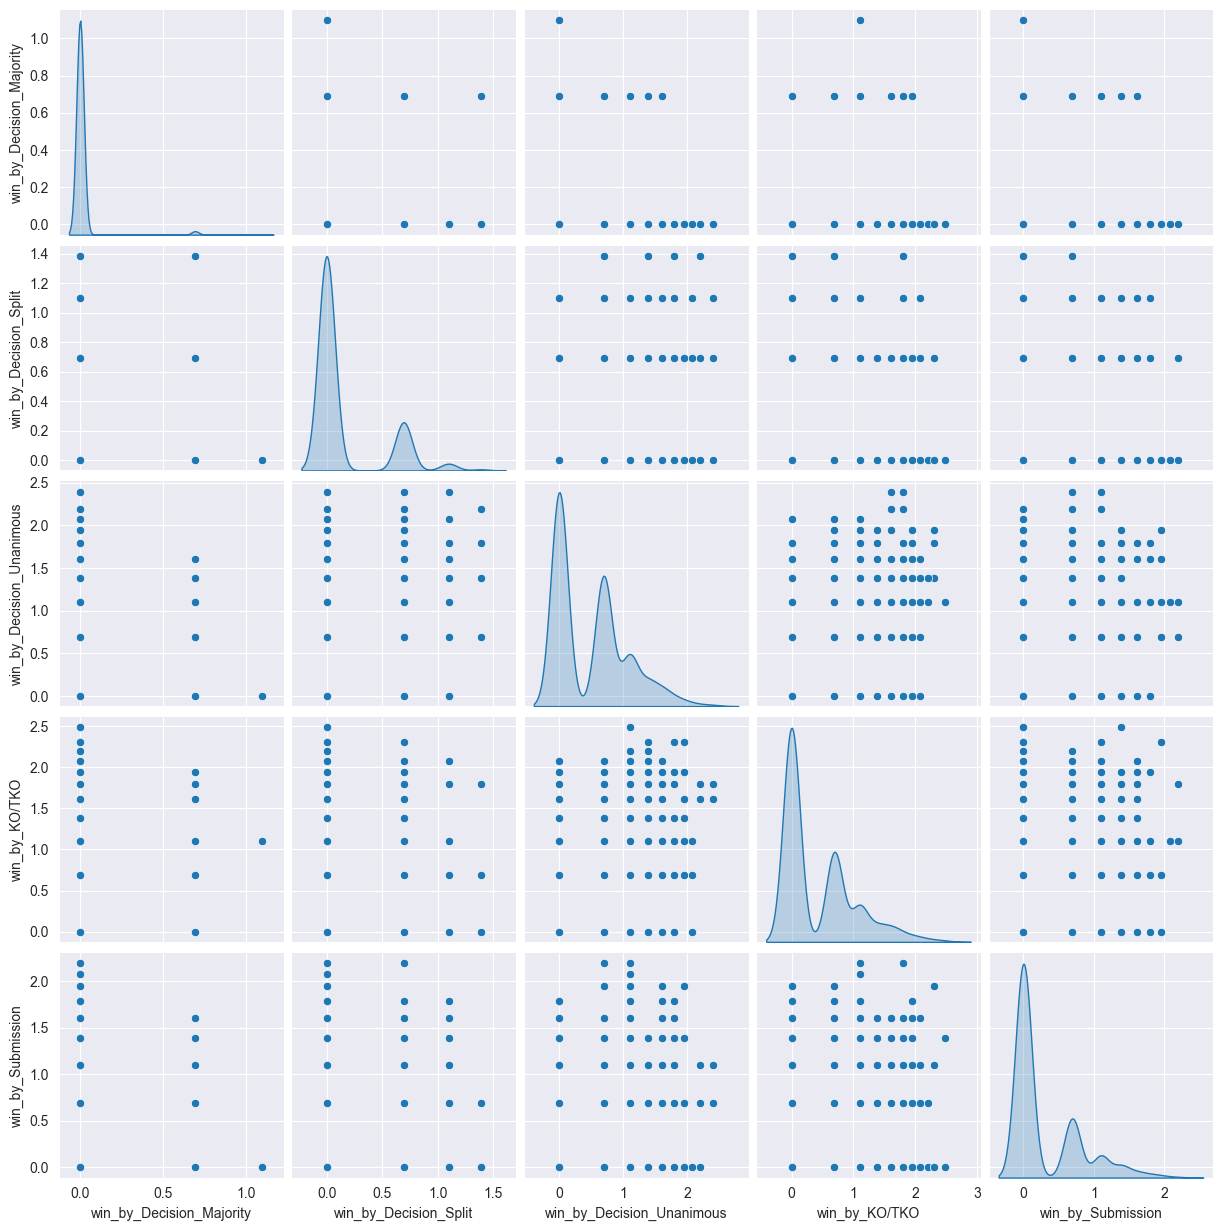

In [9]:
# Pairplot
sns.pairplot(df_fighter, diag_kind='kde')

In [10]:
# Standardize features
scaler = StandardScaler()
df_fighter_scaled = scaler.fit_transform(df_fighter.drop(columns=['fighter']))

# Combine with fighter column
df_fighter_scaled = pd.DataFrame(df_fighter_scaled, columns=df_fighter.drop(columns=['fighter']).columns)


In [11]:
# Import KMeans
from sklearn.cluster import KMeans

clustering_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_fighter_scaled)
    clustering_scores.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.


C:\Users\Yeast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Yeast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Yeast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Yeast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

Text(0.5, 1.0, 'Elbow Method')

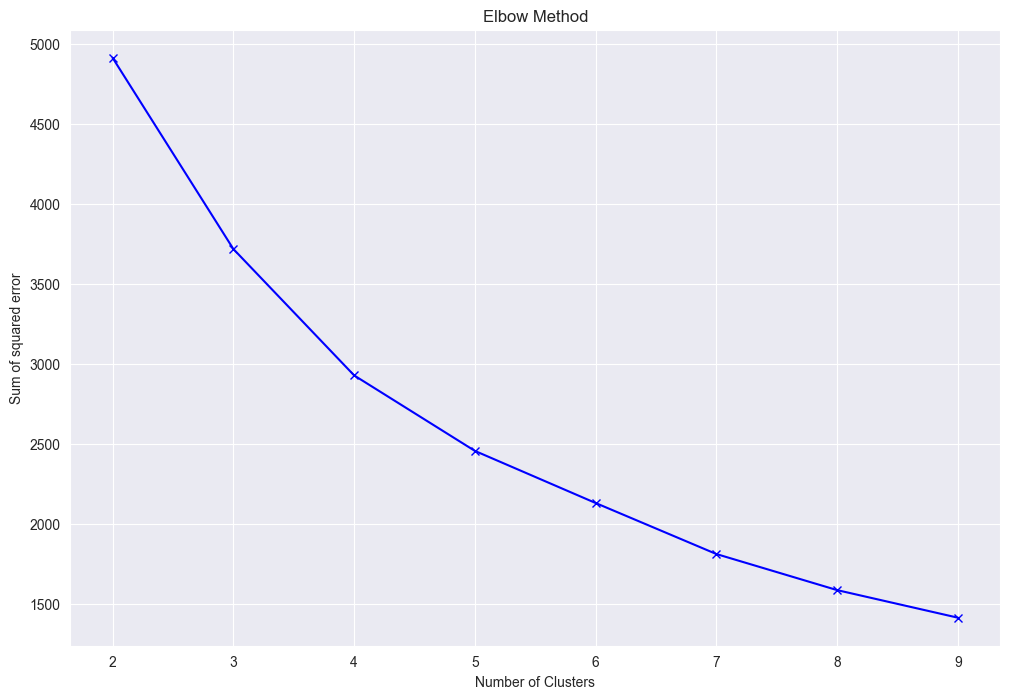

In [12]:
# Plotting Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(range(2, 10), clustering_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

num_of_cluster = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

silhouette_avg_list = []

fig, ax = plt.subplots(9, 2, figsize=(30,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10, random_state=42)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(df_fighter_scaled)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_fighter_scaled)
    silhouette_avg = silhouette_score(df_fighter_scaled, cluster_labels)
    silhouette_avg_list.append((k, silhouette_avg))
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

ModuleNotFoundError: No module named 'distutils'

In [ ]:
# Plot silhouette score
plt.figure(figsize=(12, 8))
plt.plot(*zip(*silhouette_avg_list), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')


In [ ]:
# Add cluster labels to df_fighter
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans.fit(df_fighter_scaled)
df_fighter['cluster'] = kmeans.labels_

df_fighter.head()

In [ ]:
# Count each cluster
df_fighter['cluster'].value_counts()

In [ ]:
# Split features and cluster
X = df_fighter_scaled
y = df_fighter['cluster']



In [ ]:
# PCA to 2 dimensions
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# pca.fit(df_fighter_scaled)

# df_fighter_pca = pca.transform(X)

# df_fighter_pca = pd.DataFrame(df_fighter_pca, columns=['pca1', 'pca2'])
# df_fighter_pca['cluster'] = y

# df_fighter_pca.head()

In [ ]:
# Plot PCA
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_fighter_pca, palette='Set1')
# plt.title('KMeans with 17 clusters')

# plt.show()

In [ ]:
# Interpretasi cluster
cluster_0 = df_fighter[df_fighter['cluster'] == 0]

cluster_0.describe().T

In [ ]:
cluster_0.head()

In [ ]:
cluster_1 = df_fighter[df_fighter['cluster'] == 1]

cluster_1.describe().T

In [ ]:
cluster_1.head()

In [ ]:
cluster_2 = df_fighter[df_fighter['cluster'] == 2]

cluster_2.describe().T

In [ ]:
cluster_2.head()

In [ ]:
cluster_3 = df_fighter[df_fighter['cluster'] == 3]

cluster_3.describe().T

In [ ]:
cluster_3.head()

In [ ]:
cluster_4 = df_fighter[df_fighter['cluster'] == 4]

cluster_4.describe().T

In [ ]:
cluster_4.head()

In [ ]:
cluster_5 = df_fighter[df_fighter['cluster'] == 5]

cluster_5.describe().T

In [ ]:
cluster_5.head()

In [ ]:
cluster_6 = df_fighter[df_fighter['cluster'] == 6]

cluster_6.describe().T

In [ ]:
cluster_6.head()

In [ ]:
cluster_7 = df_fighter[df_fighter['cluster'] == 7]

cluster_7.describe().T

In [ ]:
cluster_7.head()

In [ ]:
cluster_8 = df_fighter[df_fighter['cluster'] == 8]

cluster_8.describe().T

In [ ]:
cluster_8.head()

In [ ]:
cluster_9 = df_fighter[df_fighter['cluster'] == 9]

cluster_9.describe().T

In [ ]:
cluster_9.head()

In [ ]:
cluster_10 = df_fighter[df_fighter['cluster'] == 10]

cluster_10.describe().T

In [ ]:
cluster_10.head()

In [ ]:
cluster_11 = df_fighter[df_fighter['cluster'] == 11]

cluster_11.describe().T

In [ ]:
cluster_11.head()

In [ ]:
cluster_12 = df_fighter[df_fighter['cluster'] == 12]

cluster_12.describe().T

In [ ]:
cluster_12.head()

In [ ]:
cluster_13 = df_fighter[df_fighter['cluster'] == 13]

cluster_13.describe().T

In [ ]:
cluster_13.head()

In [ ]:
cluster_14 = df_fighter[df_fighter['cluster'] == 14]

cluster_14.describe().T

In [ ]:
cluster_14.head()

In [ ]:
cluster_15 = df_fighter[df_fighter['cluster'] == 15]

cluster_15.describe().T

In [ ]:
cluster_15.head()

In [ ]:
cluster_16 = df_fighter[df_fighter['cluster'] == 16]

cluster_16.describe().T

In [ ]:
cluster_16.head()

In [21]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(df_fighter_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters


22

### Interpretasi Cluster

Notes :
- REV mungkin feature yang ngga terlalu berguna (liat lagi nanti hasil clustering)